TP1
========

**Objectif**: calculer les coefficients de la SFD (Série de Fourier Discrète) avec Python et à la main.

**Prérequis** cours d'OML4 "Série de Fourier Discrète".

**Durée:** 4h

**Instructions générales:**
    
* téléchargez le fichier notebook `.ipynb` à l'adresse [www](https://gitlab.com/hazaa/oml3/-/blob/main/book/TP1-DFT.ipynb)
* remettez votre travail sur eprel.
* un fichier nommé: ```TP1-NOM.ipynb```
* Si vous cherchez de l'**aide** sur une fonction Python/Numpy depuis Jupyter Notebook
   *  ouvrez une cellule et taper `help(np.sin)`ou `?np.sin`, puis validez.
   *  sinon cherchez dans sur la documentation générale [Python](https://docs.python.org/) ou [Numpy](https://numpy.org/doc/stable/reference/)
   * tout en bas de ce notebook, vous trouverez un **aide-mémoire** des fonctions numpy utiles.

In [1]:
# code à executer en début de TP
import numpy as np
from scipy.fft import fft, ifft, fftfreq, fftshift
import matplotlib.pylab as plt
from scipy.io import wavfile
plt.rc('font',size=18)

1 Rappel: calcul numérique vectorisé sous Python
----------

## a) Calcul numérique vectorisé

Supposons qu'on veuille calculer les carrés de entiers de 0 à 4 en **langage C**.
On déclare un tableau et on écrit une boucle:

```C
n=5;
int tab[n];
for(int i=0;i<n; i++)
    {tab[i]=i*i;
    }
```


A l'inverse, sous **Python** (mais aussi Matlab, etc...) on va plutôt:
    
1. définir un vecteur `v = np.arange(5)`, c'est à dire un tableau d'entiers de $0$ jusqu'à $4$, de taille 5.
1. appliquer une fonction **"vectorisée"** sur ce tableau: `np.power(v,2)`, c'est-à-dire une fonction qui va agir terme-à-terme sur **chacun** des éléments du tableau.
             

In [5]:
v = np.arange(5)
v_square = np.power(v,2)
print("v={}".format(v))
print("v_square={}".format(v_square))

v=[0 1 2 3 4]
v_square=[ 0  1  4  9 16]


NB: Pour **lire** la valeur d'un tableau, la syntaxe est la même qu'en langage C: 

In [ ]:
print(v[0])

Une autre manière de calculer le carré des éléments du tableau est de multiplier `v` par lui-même, ce qui donne un produit **terme à terme**:

In [37]:
v*v

array([ 0,  1,  4,  9, 16])

### b) Tracé de diagramme

Pour tracer le diagramme d'une fonction on dispose de plusieurs fonctions: `stem(x,y)`, `plot(x,y)` où $x$ est un vecteur contenant les abscisses des points qu'on veut dessiner, et $y$ un vecteur contenant les ordonnées.

On peut dessiner plusieurs diagrammes côte à côte avec la fonction `subplots`.

Text(0, 0.5, '$x_n$')

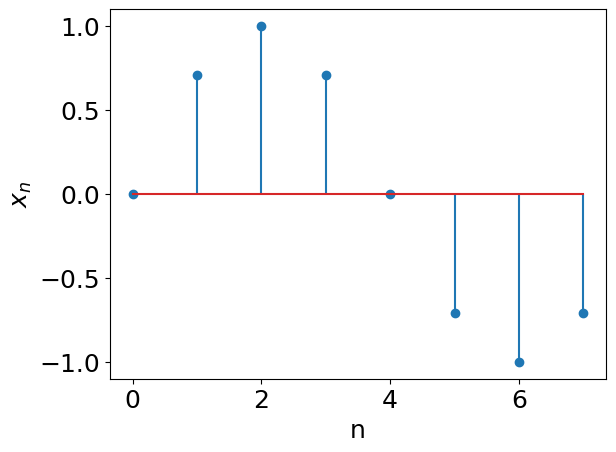

In [7]:
# un seul diagramme
N=8
n = np.arange(N)
k0 = 1
xn=np.sin(2*(np.pi/N)*k0*n)

plt.stem(n, xn) # ax[0]: premier graphe
plt.xlabel('n')
plt.ylabel(r'$x_n$')

Text(0, 0.5, '$x_n$')

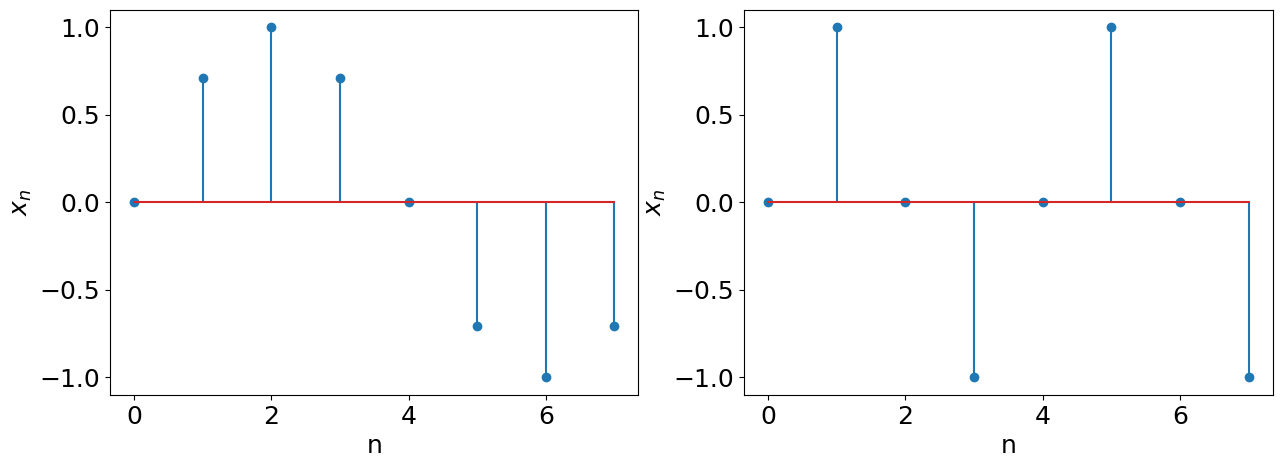

In [9]:
# deux diagrammes côte-à-côte
N=8
k0 = 1
n = np.arange(N)
xn=np.sin(2*(np.pi/N)*k0*n)

fig,ax = plt.subplots(1,2, figsize=(15,5))     # plusieurs graphes. 1 ligne, 2 colonnes
ax[0].stem(n, xn)                              # ax[0]: premier graphe
ax[0].set_xlabel('n')
ax[0].set_ylabel(r'$x_n$')

k0 = 2
n = np.arange(N)
xn=np.sin(2*(np.pi/N)*k0*n)

ax[1].stem(n, xn)                              # ax[1]: second graphe
ax[1].set_xlabel('n')
ax[1].set_ylabel(r'$x_n$')

**QUESTION 1.1**: En Python, calculer et afficher le cube des entiers de 0 jusqu'à 10    

**QUESTION 1.2** soit une exponentielle complexe périodique $N=16, ~k_0=2$. Tracer deux diagrammes côte-à-côte: le premier avec la partie réelle de l'exponentielle, le second avec sa partie imaginaire. Reportez-vous à l'aide en bas du sujet pour trouver les bonnes fonctions.

2 Série de Fourier Discrète, signaux simples
-------

Soit un signal $x[n]$ de longueur $N$. On peut calculer les $X[k]$ sous Python avec la fonction `fft()`.

(-0.02, 0.5)

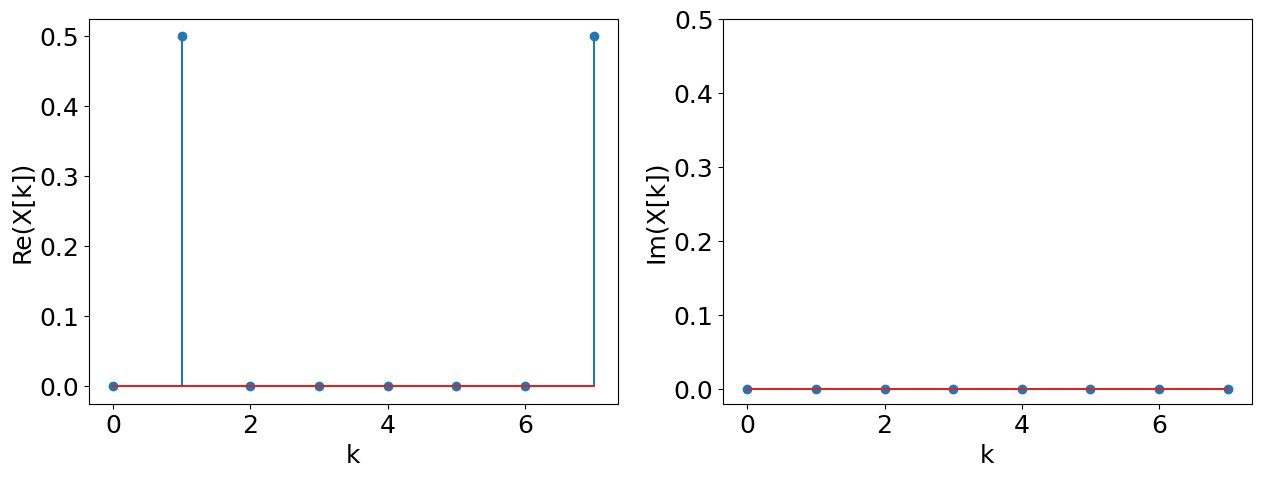

In [ ]:
# Exemple
N=8
k0 = 1
n = np.arange(N)
xn=np.cos(2*(np.pi/N)*k0*n)

# calcul de la TFD
Xk=fft(xn,norm='forward')

# affichage
k=n
fig,ax = plt.subplots(1,2, figsize=(15,5))     # plusieurs graphes. 1 ligne, 2 colonnes
ax[0].stem(k,np.real(Xk))
ax[0].set_xlabel('k')
ax[0].set_ylabel('Re(X[k])')

ax[1].stem(k, np.imag(Xk)) # ax[1]: second graphe
ax[1].set_xlabel('k')
ax[1].set_ylabel('Im(X[k])')
#ax[1].set_ylim([-0.02,0.5])   # POUR CHANGER d'ECHELLE SI BESOIN 

**QUESTION 2.1:**

Calculer $X[k]$ à la main, puis en Python. Tracer le spectre (partie réelle et imaginaire).

1. $x[n]=e^{j\frac{2 \pi}{N}k_0 n}$ pour $N=16$ et $k_0=1,2,3$
1. $x[n]=\cos(\frac{2 \pi}{N}k_0 n)$ pour $N=16$ et $k_0=1,2,3$
1. $x[n]=\sin(\frac{2 \pi}{N}k_0 n)$ pour $N=16$ et $k_0=1,2,3$
1. $x[n]= 1+ \sin(\frac{2\pi}{N}n) + 3\cos(\frac{2\pi}{N}n) + \cos(\frac{4\pi}{N}n)$ pour $N=16$.
1. Dirac $\delta[n-n_0]$ pour $n_0 \in [0,1,2]$
1. Signal constant.


**QUESTION 2.2:**

Calculer la valeur efficace des signaux ci-dessus à la main (sauf le 1 qui est complexe), puis en Python, de deux manières en utilisant la formule de Parseval.

Attention: les deux valeurs données par Parseval doivent être les mêmes.

**QUESTION 2.3** On dipose d'un signal $v[n]$ défini ci-dessous, qui modélise le courant dans une charge non-linéaire. On veut calculer le **Total Harmonic Distorsion** (THD), pour quantifier l'écart avec une sinusoïde.

1. Calculer et afficher les coefficients $X[k]$.
1. En déduire le THD comme vu en cours et en TD.

In [ ]:
n=np.arange(64)
vn = np.sin(2*np.pi/16*n)
thr=0.7
idx_vn_pos = vn>thr
idx_vn_neg = vn<-thr
vn[idx_vn_pos]=thr
vn[idx_vn_neg]=-thr

**QUESTION 2.4** lorsque la période du signal échantillonné ne correspond pas à $N$, on a vu en cours que la `fft()` obtenue n'était pas aussi simple que pour un cosinus $N$-périodique.

1. Soit le signal $x[n]=\cos(\frac{2\pi}{60}n)$ pour $n \in [0; N[$ et $N=64$. Tracer  le spectre avec Python.
1. Comparer le résultat obtenu avec le cas d'un cosinus $y[n]=\cos(\frac{2\pi}{64}k_0 n)$ avec $k_0=1$.
1. Interpréter.

3 SFD de signaux réels
--------------

On va maintenant travailler sur signaux réels inconnus, échantillonnés à $f_s=16~kHz$.

* Téléchargez le fichier `vi-1483315200_234072_trim.wav` à l'adresse: [www](https://gitlab.com/hazaa/oml3/-/tree/main/book/data)
* Executez le code ci-dessous qui va charger les données.

In [28]:
wav_fname = 'vi-1483315200_234072_trim.wav'  # CHEMIN A VERIFIER !!!
samplerate, data = wavfile.read(wav_fname)
x=signal[76:396,0]/np.max(signal[76:396,0])
length = x.shape[0] 
#print(f"number of channels = {x.shape[1]}")
print(f"length = {length}s")

number of channels = 2
length = 1.0s


**QUESTION 3.1**:
* dans le domaine temporel tracer le graphes du signal.
* dans le domaine fréquentiel: tracer le graphe de la partie réelle et imaginaire de $X[k]$.


**NB**: 
   * pour zoomer : 
    

In [ ]:
Xk = 0                                    # A MODIFIER !!!

# affichage
fig,ax = plt.subplots(1,2, figsize=(15,5))     
ax[0].plot( ?? ,?? )                     # A MODIFIER !!!        
ax[0].set_xlabel('k')
ax[0].set_ylabel('Re(Xk))')
#ax[0].set_xlim([0,10])                  # pour zoomer
ax[1].plot( ?? ,?? )                     # A MODIFIER !!!        
ax[1].set_xlabel('k')
ax[1].set_ylabel('Im(Xk))')

**QUESTION 3.2**: interprétez le graphe précédent. A votre avis quelle grandeur physique observe-t-on ?

**QUESTION 3.3**: 

Calculer la valeur efficace du signal.

**QUESTION 3.4**: 

Calculer le Taux de Distorsion Harmonique (TDH).

BONUS
---------

**QUESTION 4.1** le calcul des coefficients de la SFD $X[k]$ à partir de $x[n]$ est réversible, comme vu en cours. En Python, on dispose de la fonction **inverse** `ifft(Xk,norm='forward')` pour effectuer ce calcul.

1. Rappeler la formule de reconstruction d'un signal temporel $x[n]$ à partir des coefficients de la SFD $X[k]$
1. Soit un signal cosinus tel que $N=16$ et $k_0=1$. Calculer d'abod les $X[k]$ puis calculer les $x[n]$ grâce à la fonction ci-dessus. 
1. Vérifier qu'on retrouve bien le signal de départ, en l'affichant dans le domaine temporel.


Annexes
-------

<h3>Commandes Python/Numpy/Scipy utiles</h3>

|  | Explication | Exemple |
|----|----|----|
|  `1j` | Nombre complexe $j$ | `np.real(1j)`| 
|  `np.pi` | Constante de valeur $\pi$ | Affiche la valeur de $\cos(\pi)$: `np.cos(np.pi)`| 
|`np.ones(n)`|vecteur composé de 1 |`x=np.ones(10)`|
|`np.zeros(n)`|vecteur composé de 0 |`y=np.zeros(20)`|
|  `np.linspace(a,b,n)` | Calcule $n$ points répartis sur un intervalle $[a,b]$ | `t=np.linspace(0,1,10)`|   
| `np.sin,np.cos,np.exp` | Fonctions vectorisées de base | `A = np.sin(np.pi/2.) +np.exp(-1)` | 
|   | | `x=np.linspace(0,2*np.pi,50); y=np.sin(x)` | 
| carré | `**2`| `x=2; y=x**2` | 
|  | | `x=np.linspace(0,1,50); y=x**2` | 
|  `np.sqrt(x)` | Racine carrée | `np.sqrt(4)`| 
|  `plt.plot(t,x)` | Trace une ligne composée de points $(x_1,y_1), (x_2,y_2), \ldots$| `t = np.linspace (0,1,10); plt.plot(t,t**2)`|  
|`np.real(x)`| partie réelle| `np.real(2+1j)`|
|`np.imag(x)`| partie imaginaire|`np.imag([1,1j])`|
|`np.sum(x)`| somme des éléments de `x`| `np.sum([1,1,1])`|
|`np.abs`| valeur absolue (ou module pour les complexes )| `np.abs(-1); np.abs(1+1j)`|
|`x.shape`| taille d'un tableau crée avec numpy| `x=np.zeros(10); print(x.shape[0])`| 
|`x.dtype`|type des éléments tableau numpy| `x=np.linspace(0,1,10); x.dtype`|
|`ax[0].set_xlabel()`| assigner un titre à l'axe des abscisses| |
|`ax[0].set_xlim([a,b])`| changer la zone de l'axe des abscisses|`fig,ax = plt.subplots(1,2); ax[0].plot(x,y); ax[0].set_xlim([0,1])` |
|`ax[0].set_ylim([a,b])`| changer la zone de l'axe des ordonnées|`fig,ax = plt.subplots(1,2); ax[0].plot(x,y); ax[0].set_ylim([0,1])` |
|`ax[0].semilogy(x,y)`| comme `plot` mais en échelle y logarithmique|`fig,ax = plt.subplots(1,2);ax[0].semilogy(x,y)` |
|`fft()`| voir documentation ci-dessous|`Xk = fft(x,norm='forward')`|
|`ifft()`| voir documentation ci-dessous|`xn = ifft(Xk,norm='forward')`|


La [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fft.html#scipy.fft.fft) de la fonction scipy `fft()` nous dit que si `y=fft(x)`:

>    The frequency term ``f=k/n`` is found at ``y[k]``. At ``y[n/2]`` we reach
>    the Nyquist frequency and wrap around to the negative-frequency terms.


La [documentation](https://docs.scipy.org/doc/scipy/tutorial/fft.html#d-discrete-fourier-transforms) dit aussi que:


> For N even, the elements `y[1]...y[N/2-1]` contain the positive-frequency terms, and the elements
> `y[N/2]...y[N-1]` contain the negative-frequency terms, in order of
> decreasingly negative frequency. For N odd, the elements
> `y[1]...y[(N-1)/2]` contain the positive-frequency terms, and the
> elements `y[(N+1)/2]...y[N-1]` contain the negative-frequency terms, in order of decreasingly negative frequency.
>
> In case the sequence x is real-valued, the values of `y[n]` for positive
> frequencies is the conjugate of the values `y[n]` for negative
> frequencies (because the spectrum is symmetric). Typically, only the FFT
> corresponding to positive frequencies is plotted

(source : [github](https://github.com/scipy/scipy/blob/main/doc/source/tutorial/fft.rst))


<h3>Commandes Markdown/Latex</h3>

* Le mieux est de cliquer sur les cases de l'énoncé qui contiennent des expressions mathématiques, pour voir le code markdown/latex associé. Pour revenir à l'affichage des formules, executer la cellule avec Jupyter.
* On peut faire la même chose sur les formules du cours, avec un clic droit sur les formules. Puis choisir "Show Maths As" > "Tex Command".

<h3>Références</h3>

Real signal:
* https://www.researchgate.net/publication/310463352_COOLL_Controlled_OnOff_Loads_Library_a_Public_Dataset_of_High-Sampled_Electrical_Signals_for_Appliance_Identification
* https://coolldataset.github.io/
* https://jack-kelly.com/data/ , https://data.ukedc.rl.ac.uk/browse/edc/efficiency/residential/EnergyConsumption/Domestic/UK-DALE-2017/UK-DALE-2017-16kHz/house_1/2017/wk01, https://www.researchgate.net/publication/261289463_The_UK-DALE_dataset_domestic_appliance-level_electricity_demand_and_whole-house_demand_from_five_UK_homes
* https://github.com/18D070001
            
IO:
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.read.htm     
    
Conversion    :
* sox
* https://github.com/kkroening/ffmpeg-python/tree/master/examples
    

### More datasets

* pseudo guitare $e^{-t} sin$, comme dans `FourierTransform.mlx`
* cool dataset 100kHz

#### Audio data preprocessing

will copy the first ten seconds:

> sox infile outfile trim 0 10
  

down to 16 bits, since 24 bit is not supported by io.read

> sox vi-1483315200_234072.flac -b 16 vi-1483315200_234072_.wav trim 0 1